In [40]:
import pandas as pd

try:
    df_feedback = pd.read_csv('feedback.csv')
    df_students = pd.read_csv('students.csv')
    df_course_activity = pd.read_csv('course_activity.csv')
    display(df_feedback.head())
    display(df_students.head())
    display(df_course_activity.head())
except FileNotFoundError:
    print("One or more CSV files not found.")
    df_feedback, df_students, df_course_activity = None, None, None
except pd.errors.ParserError:
    print("Error parsing one or more CSV files.")
    df_feedback, df_students, df_course_activity = None, None, None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df_feedback, df_students, df_course_activity = None, None, None

,Student_ID,Course_ID,Rating,Feedback_Text
0,S057,UX303,2,Too fast-paced
1,S063,PY202,2,Loved the examples
2,S022,PY202,4,Could be better
3,S011,PY202,5,Needs improvement
4,S073,WD404,4,Could be better


,Student_ID,Name,Age,Gender,Location,Enrolment_Date
0,S001,Student_1,24,Female,Kolkata,24/11/2023
1,S002,Student_2,32,Other,Chennai,27/02/2023
2,S003,Student_3,28,Other,Mumbai,13/01/2023
3,S004,Student_4,25,Female,Bangalore,21/05/2023
4,S005,Student_5,24,Other,Delhi,06/05/2023


,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage
0,S001,PY202,05/01/2024,90,46.10
1,S001,DM101,28/01/2024,155,88.87
2,S001,UX303,28/01/2024,177,54.93
3,S002,PY202,03/02/2024,45,32.20
4,S002,UX303,15/03/2024,119,90.80


In [41]:
# Data Shape and Summary
print("df_feedback shape:", df_feedback.shape)
print(df_feedback.info())
print("\n")

print("df_students shape:", df_students.shape)
print(df_students.info())
print("\n")

print("df_course_activity shape:", df_course_activity.shape)
print(df_course_activity.info())
print("\n")


# Missing Values
def missing_values_summary(df, df_name):
    missing_percentage = df.isnull().sum() * 100 / len(df)
    print(f"Missing values percentage in {df_name}:\n{missing_percentage}")

missing_values_summary(df_feedback, "df_feedback")
missing_values_summary(df_students, "df_students")
missing_values_summary(df_course_activity, "df_course_activity")


# Duplicate Rows
print(f"\nNumber of duplicate rows in df_feedback: {df_feedback.duplicated().sum()}")
print(f"Number of duplicate rows in df_students: {df_students.duplicated().sum()}")
print(f"Number of duplicate rows in df_course_activity: {df_course_activity.duplicated().sum()}")


# Data Distribution (Numeric Columns)
print("\ndf_feedback numeric columns description:\n", df_feedback.describe())
print("\ndf_students numeric columns description:\n", df_students.describe())
print("\ndf_course_activity numeric columns description:\n", df_course_activity.describe())

# Unique Values (Categorical Columns)
for col in df_feedback.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in df_feedback column '{col}':\n{df_feedback[col].value_counts()}")

for col in df_students.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in df_students column '{col}':\n{df_students[col].value_counts()}")

for col in df_course_activity.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in df_course_activity column '{col}':\n{df_course_activity[col].value_counts()}")


df_feedback shape: (80, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Student_ID     80 non-null     object
 1   Course_ID      80 non-null     object
 2   Rating         80 non-null     int64 
 3   Feedback_Text  80 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.6+ KB
None


df_students shape: (100, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Student_ID      100 non-null    object
 1   Name            100 non-null    object
 2   Age             100 non-null    int64 
 3   Gender          100 non-null    object
 4   Location        100 non-null    object
 5   Enrolment_Date  100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB
None


df_course_activi

In [42]:
# Handle inconsistencies in categorical columns
# Gender column in df_students
df_students['Gender'] = df_students['Gender'].str.lower()
df_students['Gender'] = df_students['Gender'].replace({'female': 'Female', 'other': 'Other'})

# Convert date columns to datetime objects
df_students['Enrolment_Date'] = pd.to_datetime(df_students['Enrolment_Date'], format='%d/%m/%Y', errors='coerce')
df_course_activity['Date'] = pd.to_datetime(df_course_activity['Date'], format='%d/%m/%Y', errors='coerce')

# Remove duplicate rows
df_feedback.drop_duplicates(inplace=True)
df_students.drop_duplicates(inplace=True)
df_course_activity.drop_duplicates(inplace=True)

# Check for and handle missing values (if any)
for col in ['Age']:
  if df_students[col].isnull().any():
    df_students[col] = df_students[col].fillna(df_students[col].median())
    print(f"Imputed missing values in '{col}' column of df_students with the median.")

for col in ['Time_Spent_Minutes', 'Completion_Percentage']:
    if df_course_activity[col].isnull().any():
        df_course_activity[col] = df_course_activity[col].fillna(df_course_activity[col].mean())
        print(f"Imputed missing values in '{col}' column of df_course_activity with the mean.")

# Data Validation
print(f"\nNumber of duplicate rows in df_feedback after cleaning: {df_feedback.duplicated().sum()}")
print(f"Number of duplicate rows in df_students after cleaning: {df_students.duplicated().sum()}")
print(f"Number of duplicate rows in df_course_activity after cleaning: {df_course_activity.duplicated().sum()}")

print("\nUnique values in df_students['Gender'] column after cleaning:\n", df_students['Gender'].value_counts())

print("\nMissing values in df_students after cleaning:\n",df_students.isnull().sum())
print("\nMissing values in df_course_activity after cleaning:\n",df_course_activity.isnull().sum())

display(df_students.head())
display(df_course_activity.head())
display(df_feedback.head())


Number of duplicate rows in df_feedback after cleaning: 0
Number of duplicate rows in df_students after cleaning: 0
Number of duplicate rows in df_course_activity after cleaning: 0

Unique values in df_students['Gender'] column after cleaning:
 Gender
Other     36
male      34
Female    30
Name: count, dtype: int64

Missing values in df_students after cleaning:
 Student_ID        0
Name              0
Age               0
Gender            0
Location          0
Enrolment_Date    0
dtype: int64

Missing values in df_course_activity after cleaning:
 Student_ID               0
Course_ID                0
Date                     0
Time_Spent_Minutes       0
Completion_Percentage    0
dtype: int64


,Student_ID,Name,Age,Gender,Location,Enrolment_Date
0,S001,Student_1,24,Female,Kolkata,2023-11-24
1,S002,Student_2,32,Other,Chennai,2023-02-27
2,S003,Student_3,28,Other,Mumbai,2023-01-13
3,S004,Student_4,25,Female,Bangalore,2023-05-21
4,S005,Student_5,24,Other,Delhi,2023-05-06


,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage
0,S001,PY202,2024-01-05,90,46.10
1,S001,DM101,2024-01-28,155,88.87
2,S001,UX303,2024-01-28,177,54.93
3,S002,PY202,2024-02-03,45,32.20
4,S002,UX303,2024-03-15,119,90.80


,Student_ID,Course_ID,Rating,Feedback_Text
0,S057,UX303,2,Too fast-paced
1,S063,PY202,2,Loved the examples
2,S022,PY202,4,Could be better
3,S011,PY202,5,Needs improvement
4,S073,WD404,4,Could be better


In [43]:
import pandas as pd

# Convert Student_ID and Course_ID to categorical type
for df in [df_feedback, df_students, df_course_activity]:
    if 'Student_ID' in df.columns:
        if not isinstance(df['Student_ID'].dtype, pd.CategoricalDtype):
            df['Student_ID'] = df['Student_ID'].astype('category')
    if 'Course_ID' in df.columns:
        if not isinstance(df['Course_ID'].dtype, pd.CategoricalDtype):
            df['Course_ID'] = df['Course_ID'].astype('category')

# Merge the dataframes
merged_df = pd.merge(df_students, df_feedback, on='Student_ID', how='left')
merged_df = pd.merge(merged_df, df_course_activity, on=['Student_ID', 'Course_ID'], how='left')

# Justification: Merging on 'Student_ID' and 'Course_ID' combines all relevant information.
# A left join with df_students ensures all student records are retained,
# while incorporating feedback and activity details where available.

# Document changes
print("Data Type Conversions and Merging Decisions:")
print("1. Student_ID and Course_ID converted to categorical type in all dataframes.")
print("2. DataFrames merged using a left join on 'Student_ID' and 'Course_ID'.")
print("\nFinal DataFrame Shapes:")
print("df_feedback:", df_feedback.shape)
print("df_students:", df_students.shape)
print("df_course_activity:", df_course_activity.shape)
print("merged_df:", merged_df.shape)

display(merged_df.head())

Data Type Conversions and Merging Decisions:
1. Student_ID and Course_ID converted to categorical type in all dataframes.
2. DataFrames merged using a left join on 'Student_ID' and 'Course_ID'.

Final DataFrame Shapes:
df_feedback: (80, 4)
df_students: (100, 6)
df_course_activity: (659, 5)
merged_df: (159, 12)


,Student_ID,Name,Age,Gender,Location,Enrolment_Date,Course_ID,Rating,Feedback_Text,Date,Time_Spent_Minutes,Completion_Percentage
0,S001,Student_1,24,Female,Kolkata,2023-11-24,NaN,NaN,NaN,NaT,NaN,NaN
1,S002,Student_2,32,Other,Chennai,2023-02-27,PY202,3.0,Well structured,2024-02-03,45.0,32.20
2,S002,Student_2,32,Other,Chennai,2023-02-27,PY202,3.0,Well structured,2024-03-06,136.0,18.18
3,S003,Student_3,28,Other,Mumbai,2023-01-13,NaN,NaN,NaN,NaT,NaN,NaN
4,S004,Student_4,25,Female,Bangalore,2023-05-21,DM101,1.0,Excellent instructor,NaT,NaN,NaN


In [44]:
overall_avg_completion = merged_df['Completion_Percentage'].mean()
print(f"Overall Average Completion Rate: {overall_avg_completion:.2f}%")

Overall Average Completion Rate: 57.38%


In [45]:
course_engagement = merged_df.groupby('Course_ID')['Time_Spent_Minutes'].mean().sort_values()
highest_engagement_course = course_engagement.index[-1]
lowest_engagement_course = course_engagement.index[0]

print(f"Course with Highest Average Engagement Time: {highest_engagement_course} ({course_engagement[-1]:.2f} minutes)")
print(f"Course with Lowest Average Engagement Time: {lowest_engagement_course} ({course_engagement[0]:.2f} minutes)")

Course with Highest Average Engagement Time: UX303 (115.35 minutes)
Course with Lowest Average Engagement Time: PY202 (85.95 minutes)


<ipython-input-45-e3a451801562>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-45-e3a451801562>:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-45-e3a451801562>:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [46]:
# Engagement by Age Group
merged_df['Age_Group'] = pd.cut(merged_df['Age'], bins=[18, 25, 30, 35], labels=['18-25', '26-30', '31-35'])
engagement_by_age = merged_df.groupby('Age_Group')['Time_Spent_Minutes'].mean()
print("\nEngagement by Age Group:\n", engagement_by_age)

# Engagement by Location
engagement_by_location = merged_df.groupby('Location')['Time_Spent_Minutes'].mean()
print("\nEngagement by Location:\n", engagement_by_location)


Engagement by Age Group:
 Age_Group
18-25    104.036364
26-30     99.281250
31-35     97.517241
Name: Time_Spent_Minutes, dtype: float64

Engagement by Location:
 Location
Bangalore    110.892857
Chennai       89.354839
Delhi        104.971429
Kolkata      106.307692
Mumbai        92.466667
Name: Time_Spent_Minutes, dtype: float64


<ipython-input-46-52c0c57fb66f>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [47]:
avg_feedback_by_course = merged_df.groupby('Course_ID')['Rating'].mean()
print("\nAverage Feedback Rating per Course:\n", avg_feedback_by_course)


Average Feedback Rating per Course:
 Course_ID
DM101    2.960784
PY202    3.205128
UX303    2.681818
WD404    2.666667
Name: Rating, dtype: float64


<ipython-input-47-2f4dc1580b26>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [48]:
correlation = merged_df['Completion_Percentage'].corr(merged_df['Rating'])
print(f"\nCorrelation between Completion Rate and Feedback Rating: {correlation:.2f}")


Correlation between Completion Rate and Feedback Rating: -0.05


In [49]:
# Define engagement and satisfaction metrics (e.g., Time_Spent_Minutes and Rating)
merged_df['Engagement_Score'] = merged_df['Time_Spent_Minutes']
merged_df['Satisfaction_Score'] = merged_df['Rating']

# Segment students based on these metrics (e.g., using quantiles)
merged_df['Engagement_Segment'] = pd.qcut(merged_df['Engagement_Score'], 3, labels=['Low', 'Medium', 'High'])
merged_df['Satisfaction_Segment'] = pd.qcut(merged_df['Satisfaction_Score'], 3, labels=['Low', 'Medium', 'High'])

# Identify top segments based on combined engagement and satisfaction
top_segments = merged_df.groupby(['Engagement_Segment', 'Satisfaction_Segment'])['Student_ID'].count().sort_values(ascending=False).head(3)
print("\nTop 3 Student Segments based on Engagement and Satisfaction:\n", top_segments)


Top 3 Student Segments based on Engagement and Satisfaction:
 Engagement_Segment  Satisfaction_Segment
High                Low                     21
Medium              Medium                  20
Low                 Medium                  17
Name: Student_ID, dtype: int64


<ipython-input-49-8c778be89066>:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



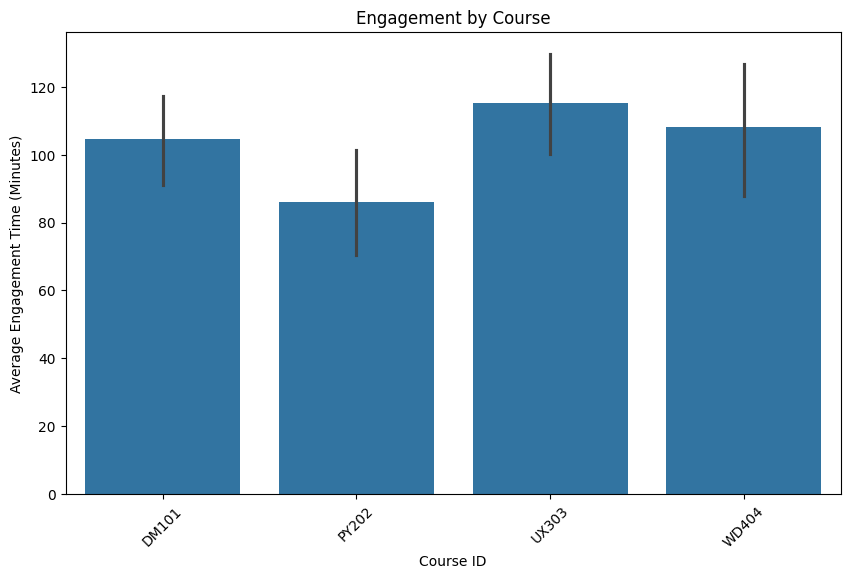

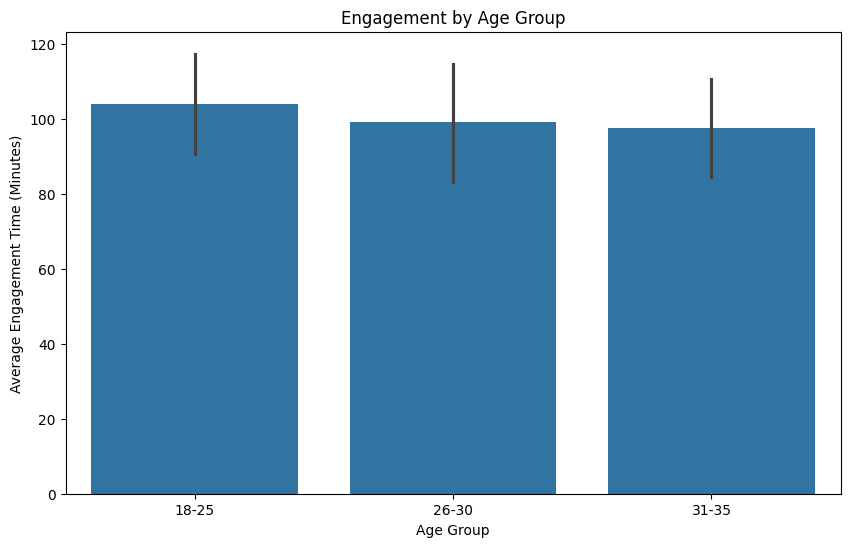

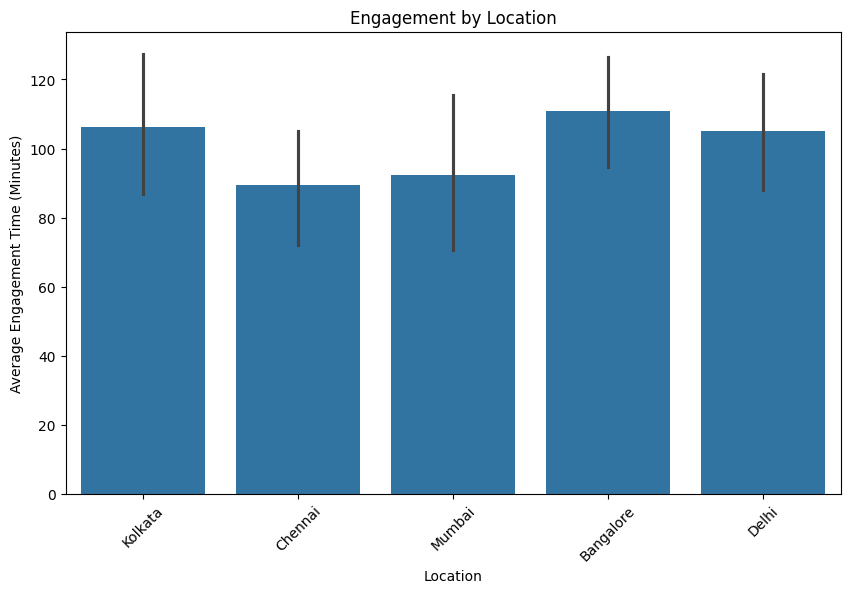

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Engagement by Course
plt.figure(figsize=(10, 6))
sns.barplot(x='Course_ID', y='Time_Spent_Minutes', data=merged_df)
plt.title('Engagement by Course')
plt.xlabel('Course ID')
plt.ylabel('Average Engagement Time (Minutes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Engagement by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Time_Spent_Minutes', data=merged_df)
plt.title('Engagement by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Engagement Time (Minutes)')
plt.show()

# Engagement by Location
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Time_Spent_Minutes', data=merged_df)
plt.title('Engagement by Location')
plt.xlabel('Location')
plt.ylabel('Average Engagement Time (Minutes)')
plt.xticks(rotation=45)
plt.show()

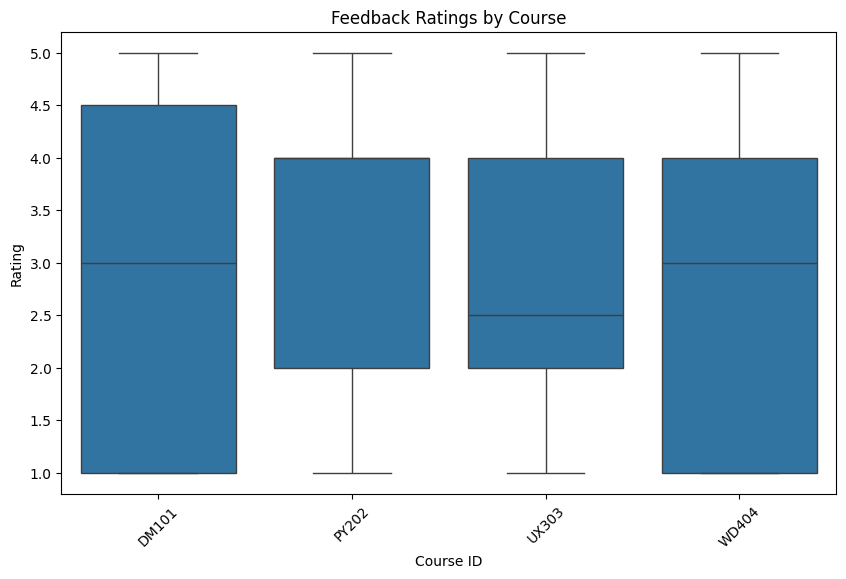

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Course_ID', y='Rating', data=merged_df)
plt.title('Feedback Ratings by Course')
plt.xlabel('Course ID')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

In [52]:
import plotly.express as px

engagement_over_time = df_course_activity.groupby('Date')['Time_Spent_Minutes'].sum().reset_index()

fig = px.line(engagement_over_time, x='Date', y='Time_Spent_Minutes', title='Engagement Trend Over Time')
fig.show()

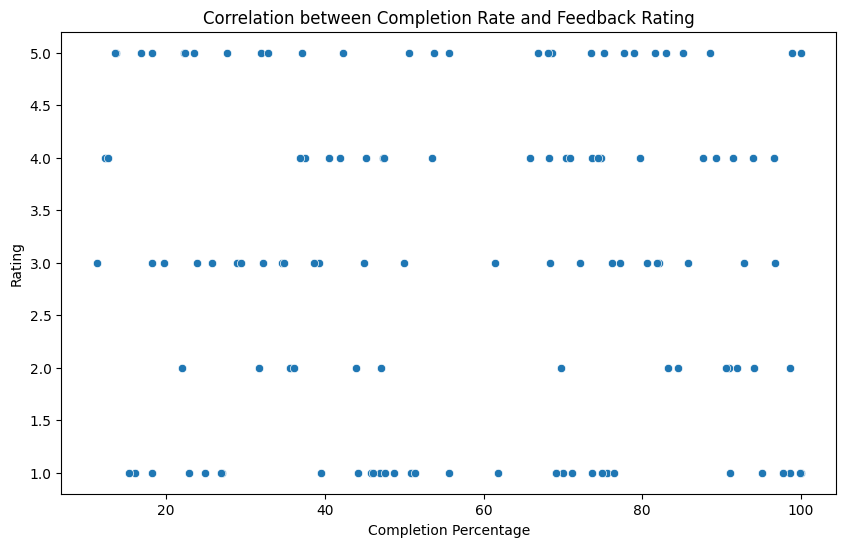

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Completion_Percentage', y='Rating', data=merged_df)
plt.title('Correlation between Completion Rate and Feedback Rating')
plt.xlabel('Completion Percentage')
plt.ylabel('Rating')
plt.show()

<ipython-input-54-3bc0e79aaf8a>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



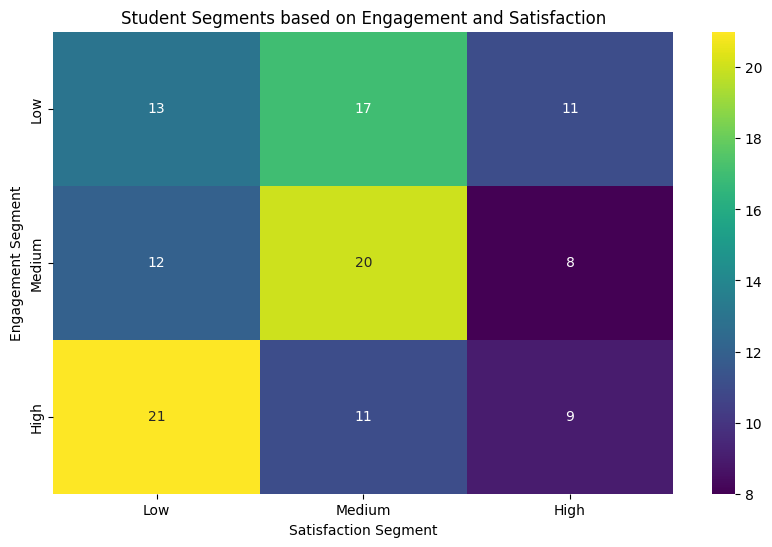

In [54]:
segment_counts = merged_df.groupby(['Engagement_Segment', 'Satisfaction_Segment'])['Student_ID'].count().reset_index()
segment_counts = segment_counts.pivot(index='Engagement_Segment', columns='Satisfaction_Segment', values='Student_ID')

plt.figure(figsize=(10, 6))
sns.heatmap(segment_counts, annot=True, cmap='viridis', fmt='d')
plt.title('Student Segments based on Engagement and Satisfaction')
plt.xlabel('Satisfaction Segment')
plt.ylabel('Engagement Segment')
plt.show()